A notebook used to run experiments

In [ ]:
# * EXPERIMENT: testing quaternion rotations using pytorch3d.transforms.quaternion_apply

from pytorch3d.transforms import quaternion_apply
from scripts.nca import VoxelUtil as voxutil
import torch
import numpy as np
pi = np.pi

# Example points
p1 = torch.tensor([1.0, 0.0, 0.0])  # Point along the x-axis
p2 = torch.tensor([0.0, 1.0, 0.0])  # Point along the y-axis
p3 = torch.tensor([0.0, 0.0, 1.0])  # Point along the z-axis

# Euler angles for rotation (in radians)
# 90 degree rotation about x-axis
rx1, ry1, rz1 = pi/2, 0.0, 0.0

# 90 degree rotation about y-axis
rx2, ry2, rz2 = 0.0, pi/2, 0.0

# 90 degree rotation about z-axis
rx3, ry3, rz3 = 0.0, 0.0, pi/2

p = torch.tensor([0.0, 0.0, -1.0])
p = p.unsqueeze(0)
rx, ry, rz = 0.0, pi/2, 0.0
rx, ry, rz = torch.tensor([rx]), torch.tensor([ry]), torch.tensor([rz])
rx = rx.unsqueeze(0)
ry = ry.unsqueeze(0)
rz = rz.unsqueeze(0)

print (f'p.shape: {p.shape}')
print (f'p: {p}')

print (f'rx: {rx}')
print (f'ry: {ry}')
print (f'rz: {rz}')

q = voxutil.euler_to_quaternion(rx, ry, rz)

print (f'quaternion rotation: {q}')

res = quaternion_apply(q, p)

print (f'res: {res}')

In [ ]:
# * EXPERIMENT: testing cuda availability

import torch 
print(torch.cuda.is_available())

In [ ]:
# * EXPERIMENT: testing model type print out

from scripts.nca.VoxelPerception import Perception
_MODEL_TYPE_ = Perception.YAW_ISO_V2
print(f'type: {_MODEL_TYPE_}')

In [ ]:
# * EXPERIMENT: testing seed creation functions

from scripts.vox.Vox import Vox
from scripts.nca import VoxelUtil as voxutil

Vox().load_from_file('../vox/rubiks_slice.vox').render(_show_grid=True)

_SEED_DIST_ = 3
_SEED_DIC_ = {
    'center': None,
    'plus_x': None,
    'minus_x': None,
    'plus_y': 'cyan',
    'minus_y': 'red',
    'plus_z': None,
    'minus_z': None,
}
seed_ten = voxutil.custom_seed(_size=15, _channels=16, _dist=_SEED_DIST_, _center=_SEED_DIC_['center'], 
                                _plus_x=_SEED_DIC_['plus_x'], _minus_x=_SEED_DIC_['minus_x'],
                                _plus_y=_SEED_DIC_['plus_y'], _minus_y=_SEED_DIC_['minus_y'],
                                _plus_z=_SEED_DIC_['plus_z'], _minus_z=_SEED_DIC_['minus_z']).unsqueeze(0)

Vox().load_from_tensor(seed_ten).render(_show_grid=True)


In [ ]:
# * EXPERIMENT: testing out spherical seed generation

import scripts.nca.VoxelUtil as util
from scripts.vox.Vox import Vox

# seed_axis = util.custom_seed(_size=16, _dist=3, _plus_x='red', _plus_y='green', _plus_z='blue')
# print (f'seed.shape: {seed_axis.shape}')
# Vox().load_from_tensor(seed_axis).render(_show_grid=True)

sphere_seed = util.seed_3d(16, 16, 5, 4)
print (f'seed.shape: {sphere_seed.shape}')

Vox().load_from_tensor(sphere_seed).render(_show_grid=True)

In [ ]:
# EXPERIMENT: saving perception functions with pickle

import pickle
from scripts.nca.VoxelNCA import VoxelNCA as NCA
from scripts.nca.VoxelPerception import Perception

model = NCA(_name='test', _model_type=Perception.ANISOTROPIC)

# * pickle perception function
with open(f'test_perception_func.pyc', 'ab') as pfile:
    pickle.dump(model.p.perception[model.model_type], pfile)

In [ ]:
# EXPERIMENT: loading perception functions with pickle

import torch
import pickle
from scripts.nca.VoxelPerception import VoxelPerception as vp

pfile = open('test_perception_func.pyc', 'rb')
fnc = pickle.load(pfile)
pfile.close()

x = torch.rand([1, 3, 2, 2, 2])

p = vp('cuda')
y = fnc(p, x)

print (f'y: {y}')

In [ ]:
# EXPERIMENT: create colorful sphere target vox

import torch
import numpy as np
from scripts.vox.Vox import Vox

size = 16
half = size//2
print (f'size: {size}, half: {half}')
sphere = np.zeros([1, size, size, size, 4])

for x in range(size):
    for y in range(size):
        for z in range(size):
            color = np.array([x/size, y/size, z/size, 1.0])
            sphere[:, x, y, z] = color
            
sphere = sphere.transpose([0, 4, 1, 2, 3])
print (f'sphere.shape: {sphere.shape}')

x, y, z = np.indices((size, size, size))

# Calculate the coordinates of the center
center = (size - 1) / 2.0

# Calculate the Euclidean distance from the center for each voxel
distances = np.sqrt((x - center)**2 + (y - center)**2 + (z - center)**2)

mask = torch.tensor(distances < half)
mask = mask[None, None, ...]


print (f'mask.shape: {mask.shape}')

sphere = torch.from_numpy(sphere)
sphere *= mask
Vox().load_from_tensor(sphere).render()

with open('sphere.npy', 'wb') as f:
# * EXPERIMENT:     np.save(f, sphere)

In [ ]:
# * EXPERIMENT: testing old custom seed creation function

import torch
from scripts.nca import VoxelUtil as util
from scripts.vox.Vox import Vox

size = 8
dist = 2

# seed_1 = util.custom_seed(_size=size, _dist=dist, _plus_x='red', _plus_y='green', _plus_z='blue')
# Vox().load_from_tensor(seed_1).render(_show_grid=True)

# seed_2 = util.custom_seed(_size=size, _dist=dist, _minus_x='green', _plus_y='red', _plus_z='blue')
# Vox().load_from_tensor(seed_2).render(_show_grid=True)

# seed_3 = util.custom_seed(_size=size, _dist=dist, _minus_x='red', _minus_y='green', _plus_z='blue')
# Vox().load_from_tensor(seed_3).render(_show_grid=True)

# seed_4 = util.custom_seed(_size=size, _dist=dist, _plus_x='green', _minus_y='red', _plus_z='blue')
# Vox().load_from_tensor(seed_4).render(_show_grid=True)

seed_5 = util.custom_seed(_size=size, _dist=2, _plus_y='red',_minus_y='green')
seed_5[-1:] = torch.rand(size, size, size)*torch.pi*2.0

Vox().load_from_tensor(seed_5).render(_show_grid=True)

print (f'seed.shape: {seed_5.shape}')
# for i in range(16):
#     print (f'layer {i}: {seed_5[i, ...]}')
    
rot_seed = torch.rot90(seed_5, 1, (2, 3))
Vox().load_from_tensor(rot_seed).render(_show_grid=True)

print (f'seed.shape: {rot_seed.shape}')
# for i in range(16):
#     print (f'layer {i}: {rot_seed[i, ...]}')

In [ ]:
# * EXPERIMENT: testing converting euler angles to quaterion and applying rotations

import torch
import math
import numpy as np
from scripts.nca import VoxelUtil as util
from scipy.spatial.transform import Rotation

test_cases = [
# Basic Cases
([0, 0, 0], [1, 0, 0, 0]),

# Rotation around Each Axis
([45, 0, 0], [0.92388, 0.38268, 0, 0]),
([0, 30, 0], [0.96593, 0, 0.25882, 0]),
([0, 0, 60], [0.86603, 0, 0, 0.5]),

# Combined Rotations
([45, 30, 60], [0.85355, 0.35355, 0.14644, 0.35355]),

# Negative Angles
([-45, -30, -60], [0.85355, -0.35355, -0.14644, -0.35355]),

# Edge Cases
([90, 0, 0], [0, 1, 0, 0]),
([0, 90, 0], [0.70711, 0.70711, 0, 0]),
([0, 0, 90], [0.70711, 0, 0, 0.70711]),

# Random Angles
([23.5, 56.8, -12.3], [0.91018, 0.36363, 0.17845, -0.09006]),

# Normalization
([180, 0, 0], [-1, 0, 0, 0]),

# Singularities
([90, 90, 0], [0.5, 0.5, 0.5, -0.5]),
([90, -90, 0], [0.5, -0.5, 0.5, 0.5]),
]
    
    
for i in range(len(test_cases)):
    tc = test_cases[i]
    _ax = tc[0][0]
    _ay = tc[0][1]
    _az = tc[0][2]
    x = torch.tensor([math.radians(_ax)]).unsqueeze(0)
    y = torch.tensor([math.radians(_ay)]).unsqueeze(0)
    z = torch.tensor([math.radians(_az)]).unsqueeze(0)
    q = util.euler_to_quaternion(x, y, z)
    
    r = Rotation.from_euler('xyz', [_ax, _ay, _az], degrees=True)
    sci_q = r.as_quat()
    sci_q2 = [sci_q[3], sci_q[0], sci_q[1], sci_q[2]]
    
    
    print (f'test case: {i}:\n\t angle: {tc[0]},\n\t quat: {tc[1]},\n\t util res: {np.array(q)},\n\t scipy res: {sci_q2},\n\t pass: {q == sci_q2}')

In [ ]:
# * EXPERIMENT: testing scipy.spatial.transform.Rotation

from scipy.spatial.transform import Rotation

p = [[0.43, 0.79, 0.11], [0.21, 0.11, 12.33]]
r = [[45, 30, 60], [-45, -30, -60]]

rot = Rotation.from_euler('xyz', r, degrees=True)
res = rot.apply(p)

print (f'p: {p}, res: {res}')

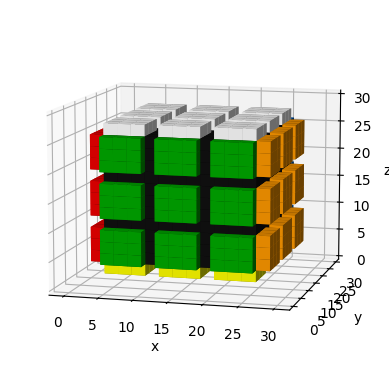

sobel_x_xy:


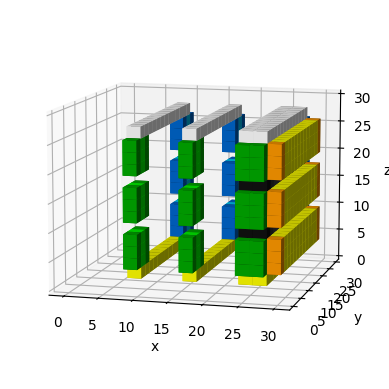

sobel_y_xy:


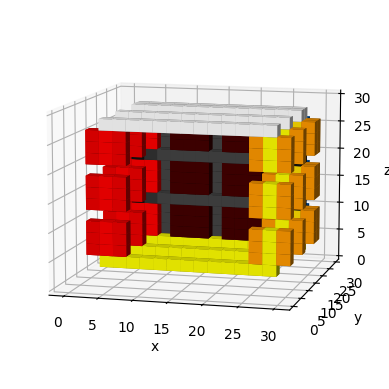

lap_xy:


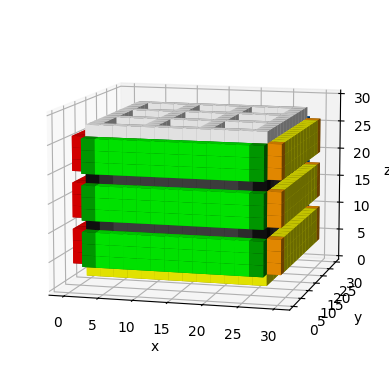

sobel_x_xz:


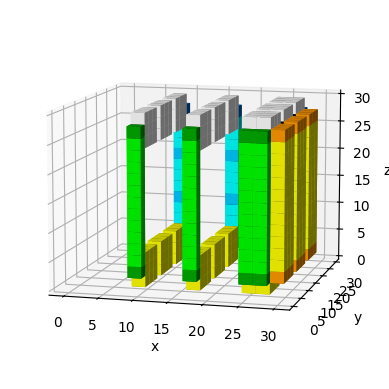

sobel_y_xz:


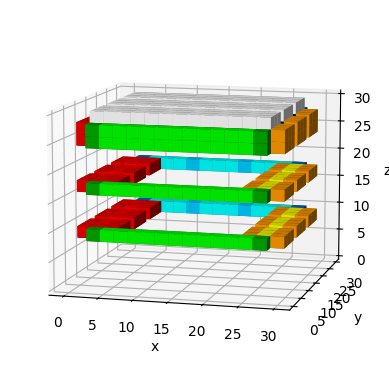

lap_xz:


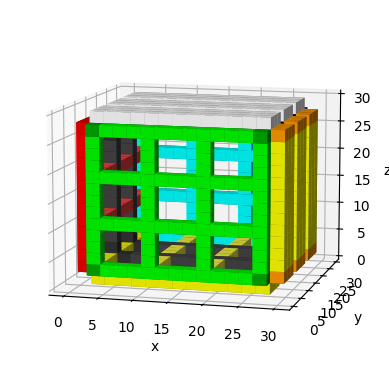

sobel_x_yz:


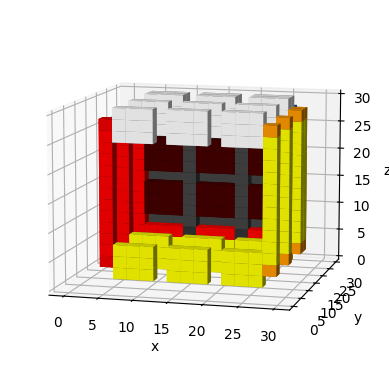

sobel_y_yz:


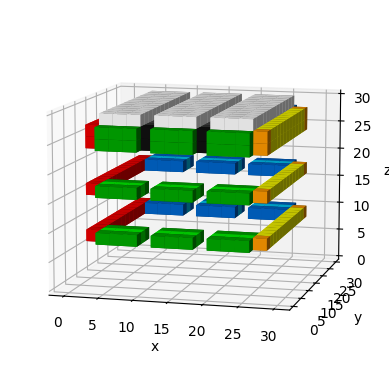

lap_yz:


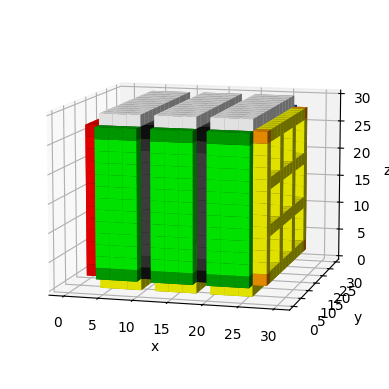

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [1]:
# * EXPERIMENT: testing custom 3d convolution kernels

import torch

from scripts.vox.Vox import Vox
from scripts.nca.VoxelPerception import VoxelPerception as vp
from scripts.nca.VoxelPerception import X_SOBEL, Y_SOBEL, Z_SOBEL_DOWN, X_SOBEL_2D_XY, Y_SOBEL_2D_XY, LAP_2D_XY, X_SOBEL_2D_XZ, Y_SOBEL_2D_XZ, LAP_2D_XZ, X_SOBEL_2D_YZ, Y_SOBEL_2D_YZ, LAP_2D_YZ

cowboy = Vox().load_from_file('../vox/rubiks_black_cube.vox')
size = 16

# * make sure Vox.tensor() works as expeccted
cowboy_ten = cowboy.tensor().to('cuda')
Vox().load_from_tensor(cowboy_ten).render(_show_grid=True)

percep = vp()

sobel_x_xy = percep.per_channel_conv3d(cowboy_ten, X_SOBEL_2D_XY[None, :])
sobel_y_xy = percep.per_channel_conv3d(cowboy_ten, Y_SOBEL_2D_XY[None, :])
lap_xy = percep.per_channel_conv3d(cowboy_ten, LAP_2D_XY[None, :])

sobel_x_xz = percep.per_channel_conv3d(cowboy_ten, X_SOBEL_2D_XZ[None, :])
sobel_y_xz = percep.per_channel_conv3d(cowboy_ten, Y_SOBEL_2D_XZ[None, :])
lap_xz= percep.per_channel_conv3d(cowboy_ten, LAP_2D_XZ[None, :])

sobel_x_yz = percep.per_channel_conv3d(cowboy_ten, X_SOBEL_2D_YZ[None, :])
sobel_y_yz = percep.per_channel_conv3d(cowboy_ten, Y_SOBEL_2D_YZ[None, :])
lap_yz= percep.per_channel_conv3d(cowboy_ten, LAP_2D_YZ[None, :])


print ('sobel_x_xy:')
Vox().load_from_tensor(sobel_x_xy).render(_show_grid=True)

print ('sobel_y_xy:')
Vox().load_from_tensor(sobel_y_xy).render(_show_grid=True)

print ('lap_xy:')
Vox().load_from_tensor(lap_xy).render(_show_grid=True)


print ('sobel_x_xz:')
Vox().load_from_tensor(sobel_x_xz).render(_show_grid=True)

print ('sobel_y_xz:')
Vox().load_from_tensor(sobel_y_xz).render(_show_grid=True)

print ('lap_xz:')
Vox().load_from_tensor(lap_xz).render(_show_grid=True)

print ('sobel_x_yz:')
Vox().load_from_tensor(sobel_x_yz).render(_show_grid=True)

print ('sobel_y_yz:')
Vox().load_from_tensor(sobel_y_yz).render(_show_grid=True)

print ('lap_yz:')
Vox().load_from_tensor(lap_yz).render(_show_grid=True)